In [1]:
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
data1=pd.read_excel('C:/Users/Bhumihar Rakesh/Desktop/Python/Arjun/Time Series/tractor.xlsx',header=0)
data1

,Sales
0,141
1,157
2,185
3,199
4,203
...,...
139,848
140,640
141,581
142,519


In [3]:
data1.head()

,Sales
0,141
1,157
2,185
3,199
4,203


In [4]:
data1.tail()

,Sales
139,848
140,640
141,581
142,519
143,605


In [5]:
data1.dtypes

Sales    int64
dtype: object

In [6]:
data1.columns

Index(['Sales'], dtype='object')

In [7]:
data1.describe()

,Sales
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [8]:
data1.mean()

Sales    389.694444
dtype: float64

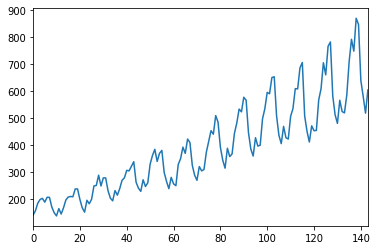

In [9]:
data1.Sales.plot()
#data1.Sales.plot()

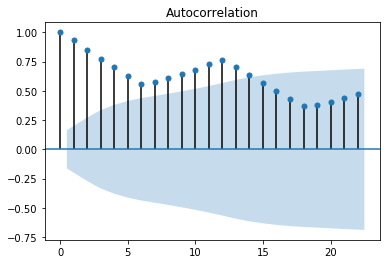

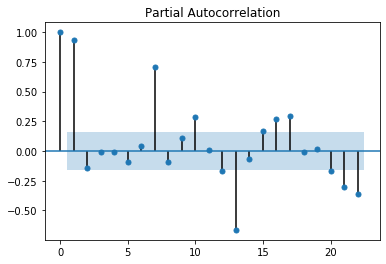

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(data1.Sales)
pacf=plot_pacf(data1.Sales)

#acf=plot_acf(data1.Sales)
#pacf=plot_pacf(data1.Sales)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

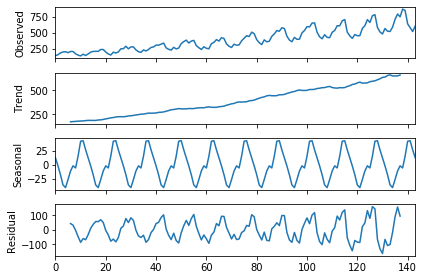

In [12]:
sd=seasonal_decompose(data1.Sales,freq=13)
sdp=sd.plot()

In [13]:
sd.resid.mean()

-0.42323830016140196

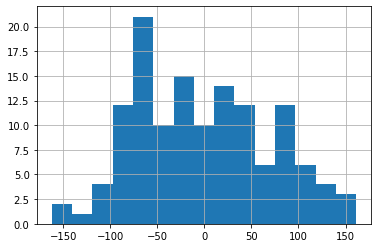

In [14]:
sd.resid.hist(bins=15)

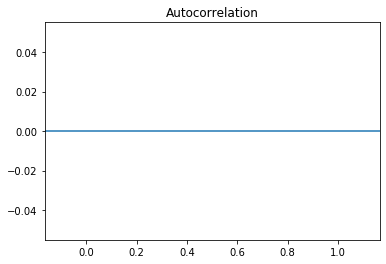

In [15]:
a=plot_acf(sd.resid)

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [17]:
a=SimpleExpSmoothing(data1.Sales).fit()
a

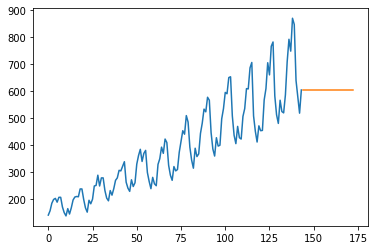

In [18]:
plt.plot(data1.Sales)
plt.plot(a.forecast(steps=29))

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
a = ExponentialSmoothing(data1.Sales, trend='add',
    seasonal='add',
    seasonal_periods=12).fit()

C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


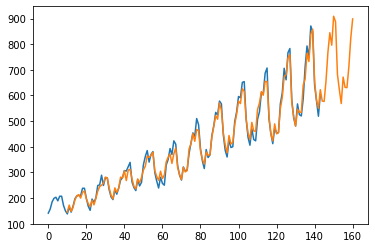

In [21]:
plt.plot(data1.Sales)
plt.plot(a.predict(start=10, end=160))